In [ ]:
!pip install yfinance
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


#CNN

## CNN 10 years

[*********************100%***********************]  1 of 1 completed


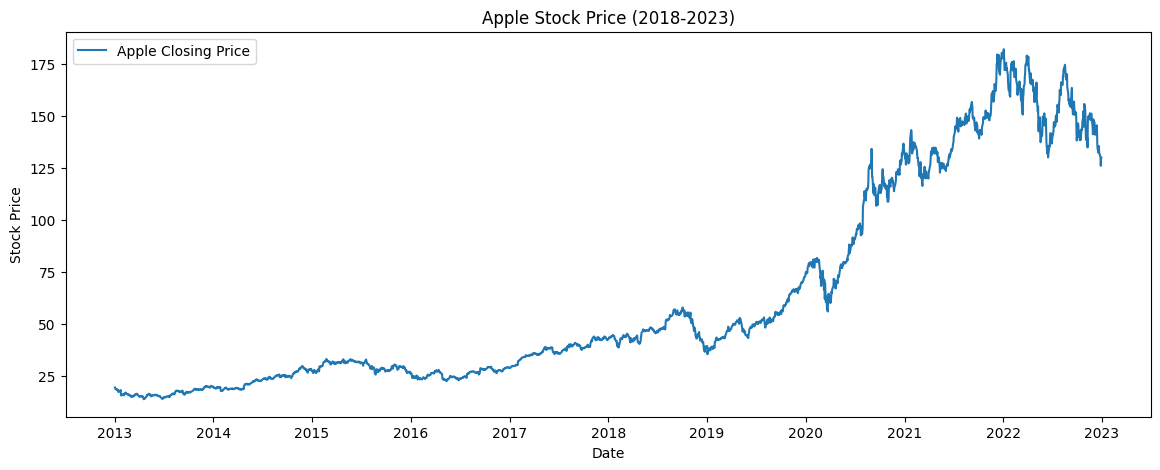

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Apple
df = yf.download('AAPL', start='2013-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Apple Closing Price')
plt.title('Apple Stock Price (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

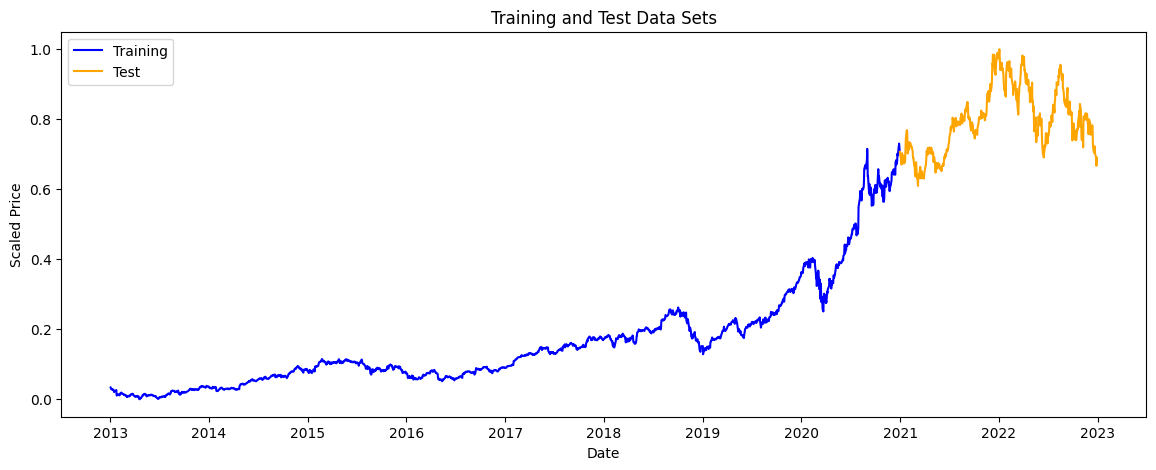

In [ ]:
# 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [ ]:
# min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 0.7303384537987628
Test Data - Min: 0.6093715365909804 Max: 1.0


In [ ]:
# Training Data
train_start_date = df.index[0]  # Starting date of the training set
train_end_date = df.index[q_80 - 1]  # Ending date of the training set

# Test Data
test_start_date = df.index[q_80]  # Starting date of the test set
test_end_date = df.index[-1]  # Ending date of the test set

# Print the start and end dates for each dataset
print("Training Data - Start Date:", train_start_date, ", End Date:", train_end_date)
print("Test Data - Start Date:", test_start_date, ", End Date:", test_end_date)

Training Data - Start Date: 2013-01-02 00:00:00 , End Date: 2020-12-30 00:00:00
Test Data - Start Date: 2020-12-31 00:00:00 , End Date: 2022-12-30 00:00:00


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (2007, 7, 1)
X_test shape: (497, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0331 - mean_absolute_error: 0.1108 - mse: 0.0331
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4139e-04 - mean_absolute_error: 0.0081 - mse: 2.4139e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1057e-04 - mean_absolute_error: 0.0061 - mse: 1.1057e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1909e-04 - mean_absolute_error: 0.0063 - mse: 1.1909e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7052e-05 - mean_absolute_error: 0.0061 - mse: 9.7052e-05
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0375e-04 - mean_absolute_error: 0.0059 - mse: 1.0375e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1244e-04 - mean_absolute_error: 0.0061 - mse: 1.1244e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0483e-04 - mean_absolute_error: 0.0062 - mse: 1.0483e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0582e-04 - m

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE: 6.6640521380995486
MAE: 5.316561493595361
MSE: 44.409590899309165
Accuracy Percentage (R-squared): 81.40%


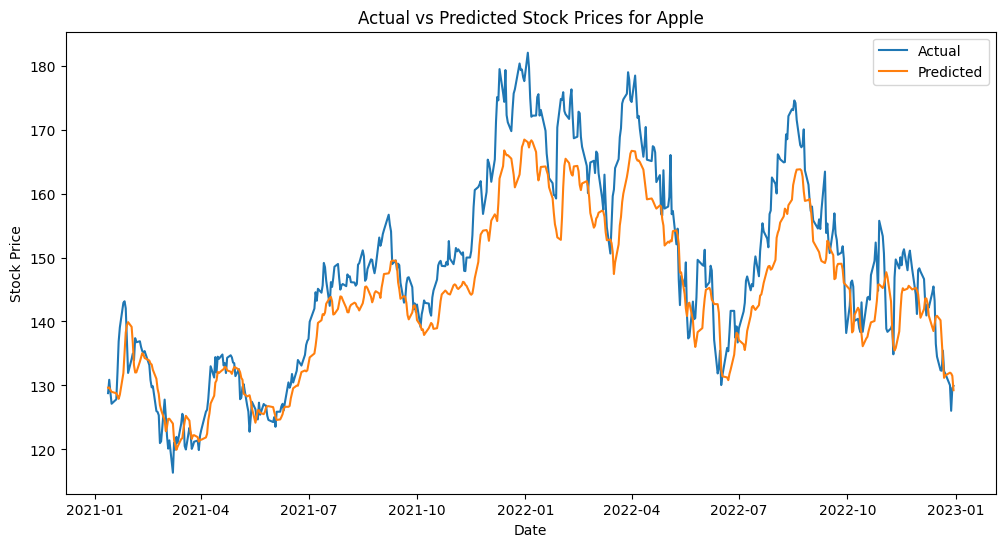

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN 5

[*********************100%%**********************]  1 of 1 completed


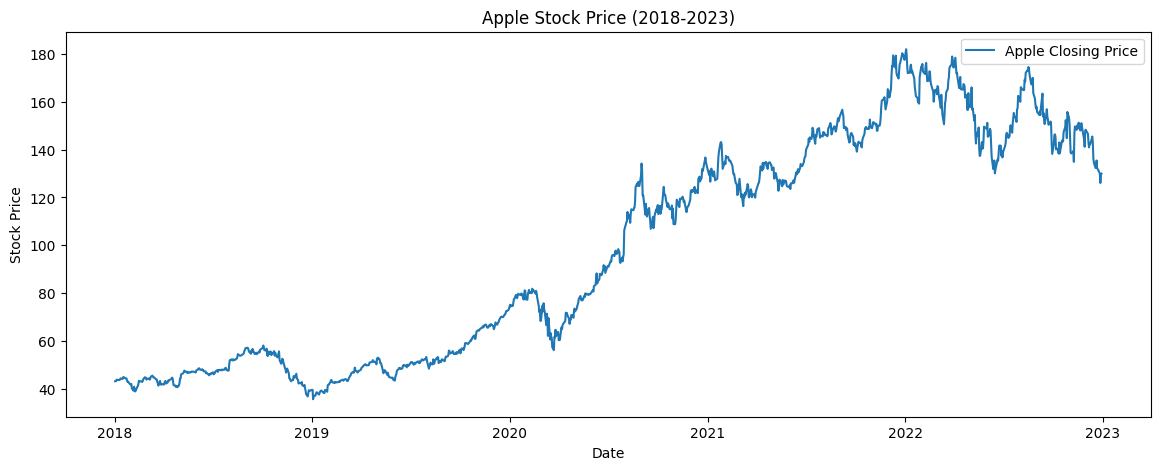

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Apple
df = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Apple Closing Price')
plt.title('Apple Stock Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

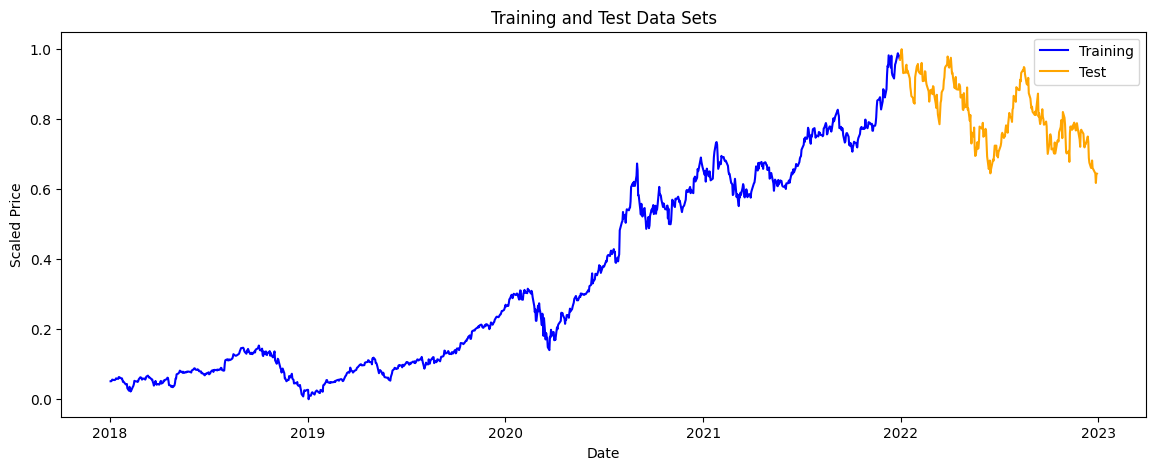

In [ ]:
# Define split points for the 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


In [ ]:
# Calculate and print the min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 0.9885295365995297
Test Data - Min: 0.6178544274217628 Max: 1.0


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1000, 7, 1)
X_test shape: (245, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile/train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1077 - mean_absolute_error: 0.2352 - mse: 0.1077
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mean_absolute_error: 0.0864 - mse: 0.0094
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0399 - mse: 0.0022
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9689e-04 - mean_absolute_error: 0.0161 - mse: 4.9689e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5465e-04 - mean_absolute_error: 0.0146 - mse: 4.5465e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6415e-04 - mean_absolute_error: 0.0145 - mse: 4.6415e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2068e-04 - mean_absolute_error: 0.0141 - mse: 4.2068e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3292e-04 - mean_absolute_error: 0.0140 - mse: 4.3292e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5265e-04 - mean_absolute_error: 0.014

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
RMSE: 5.495726922410516
MAE: 4.442674753617269
MSE: 30.203014405707766
Accuracy Percentage (R-squared): 81.45%


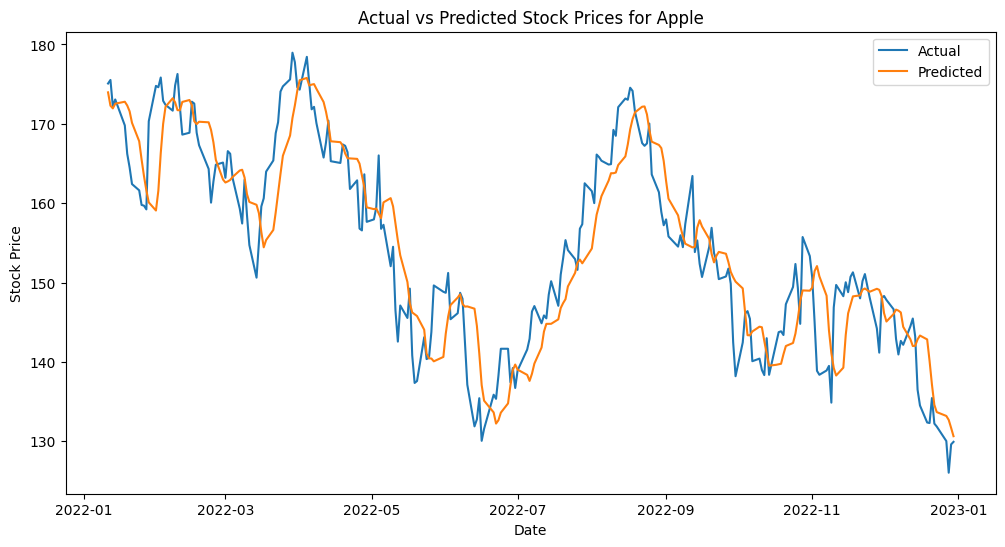

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN feature Engineering

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical data for Apple
df = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop missing values due to feature engineering
df.dropna(inplace=True)

# Print the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Close_Lagged_1,Close_Lagged_2,Close_Lagged_3,Close_Lagged_4,Close_Lagged_5
Date,,,,,,,,,,,,,,
2018-10-16,54.732498,55.747501,54.189999,55.537498,52.919338,116736000,54.92185,47.399888,50.915970,54.340000,55.527500,53.612499,54.090000,56.717499
2018-10-17,55.575001,55.660000,54.834999,55.297501,52.690651,91541600,54.99225,47.461050,49.852663,55.537498,54.340000,55.527500,53.612499,54.090000
2018-10-18,54.465000,54.935001,53.250000,54.005001,51.459091,130325200,55.03610,47.515788,44.466880,55.297501,55.537498,54.340000,55.527500,53.612499
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.242809,132314800,55.08825,47.573638,48.294974,54.005001,55.297501,55.537498,54.340000,55.527500
2018-10-22,54.947498,55.840000,54.735001,55.162498,52.562019,115168400,55.15385,47.630700,49.812443,54.827499,54.005001,55.297501,55.537498,54.340000


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define split points
q_80 = int(len(scaled_data) * 0.8)
q_90 = int(len(scaled_data) * 0.9)

# Split data into training, validation, and test sets
train_data = scaled_data[:q_80]
val_data = scaled_data[q_80:q_90]
test_data = scaled_data[q_90:]

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust sequence length for capturing historical patterns
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import time
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build CNN model with improved architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features)-1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Start the stopwatch
start_time = time.time()

# Train the model with updated settings and include the early stopping callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Stop the stopwatch
end_time = time.time()

# Calculate and display the training time
training_time_seconds = end_time - start_time
print('Training Time: {:.2f} seconds'.format(training_time_seconds))

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1566 - mean_absolute_error: 0.2647 - val_loss: 0.0085 - val_mean_absolute_error: 0.0815
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0881 - val_loss: 0.0028 - val_mean_absolute_error: 0.0407
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0726 - val_loss: 0.0030 - val_mean_absolute_error: 0.0425
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0721 - val_loss: 0.0029 - val_mean_absolute_error: 0.0419
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0685 - val_loss: 0.0032 - val_mean_absolute_error: 0.0441
Training Time: 5.14 seconds


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 8, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

## CNN hypertuining parameters

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data and reshape for CNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#70 / 15 / 15 split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Model 1: Basic CNN
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))  # Added dropout
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper CNN
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Added another Conv1D layer
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Update the evaluate_model function to include additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic CNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (CNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper CNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1487 - val_loss: 0.0087
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - val_loss: 5.9825e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2839e-04 - val_loss: 4.0848e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6048e-04 - val_loss: 4.2832e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0132e-04 - val_loss: 3.9420e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9558e-04 - val_loss: 3.8844e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8720e-04 - val_loss: 3.7356e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7108e-04 - val_loss: 3.9808e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4269e-04 - val_loss: 4.1101e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6931e-04 - val_loss: 3.8604e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9397e-04 - val_loss: 3.791

## CNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


# Feature engineering
df = feature_engineering(df)

# Feature Selection
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
X = df[feature_columns].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit to data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2]))) #input layer

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 2)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 20s]
val_loss: 5.695186614990234

Best val_loss So Far: 5.695186614990234
Total elapsed time: 00h 02m 53s
Best Hyperparameters:
Number of Layers: 2
Filters: 96
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 145.5994 - mean_absolute_error: 8.2612 - mean_squared_error: 145.5994 - val_loss: 6.9192 - val_mean_absolute_error: 2.0858 - val_mean_squared_error: 6.9192
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.6654 - mean_absolute_error: 7.9054 - mean_squared_error: 119.6654 - val_loss: 52.9534 - val_mean_absolute_error: 6.8065 - val_mean_squared_error: 52.9534
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 136.6008 - mean_absolute_error: 8.0880 - mean_squared_error: 136.6008 - val_loss: 53.5867 - val_mean_absolute_error: 6.8993 - val_mean_squared_error: 53.5867
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.0788 - mean_absolute_error: 7.9618 - mean_squared_error: 135.0788 - val_loss: 48.0827 - val_mean_absolute_error: 6.5132 - val_mean_squared_error: 48.0827
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.4684 - mean_absolute_error: 8.3596 - mean_squared_error: 144.4684 - val_loss: 21.3438 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 181.7517 - mean_absolute_error: 9.3075 - mean_squared_error: 181.7517 - val_loss: 129.3763 - val_mean_absolute_error: 10.7275 - val_mean_squared_error: 129.3763
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 185.3413 - mean_absolute_error: 9.3563 - mean_squared_error: 185.3413 - val_loss: 13.9895 - val_mean_absolute_error: 2.9868 - val_mean_squared_error: 13.9895
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 192.3534 - mean_absolute_error: 9.6266 - mean_squared_error: 192.3534 - val_loss: 146.5788 - val_mean_absolute_error: 11.5571 - val_mean_squared_error: 146.5788
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 197.5837 - mean_absolute_error: 9.4325 - mean_squared_error: 197.5837 - val_loss: 34.9149 - val_mean_absolute_error: 4.9126 - val_mean_squared_error: 34.9149
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 185.3083 - mean_absolute_error: 9.3765 - mean_squared_error: 185.3083 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 79.0750 - mean_absolute_error: 6.6946 - mean_squared_error: 79.0750 - val_loss: 47.5836 - val_mean_absolute_error: 6.2961 - val_mean_squared_error: 47.5836
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.3397 - mean_absolute_error: 6.0808 - mean_squared_error: 64.3397 - val_loss: 29.1300 - val_mean_absolute_error: 4.7076 - val_mean_squared_error: 29.1300
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.4119 - mean_absolute_error: 6.3537 - mean_squared_error: 69.4119 - val_loss: 24.9993 - val_mean_absolute_error: 4.2358 - val_mean_squared_error: 24.9993
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.1474 - mean_absolute_error: 5.9504 - mean_squared_error: 61.1474 - val_loss: 9.4689 - val_mean_absolute_error: 2.2731 - val_mean_squared_error: 9.4689
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.9516 - mean_absolute_error: 6.0733 - mean_squared_error: 62.9516 - val_loss: 105.0990 - val_mea

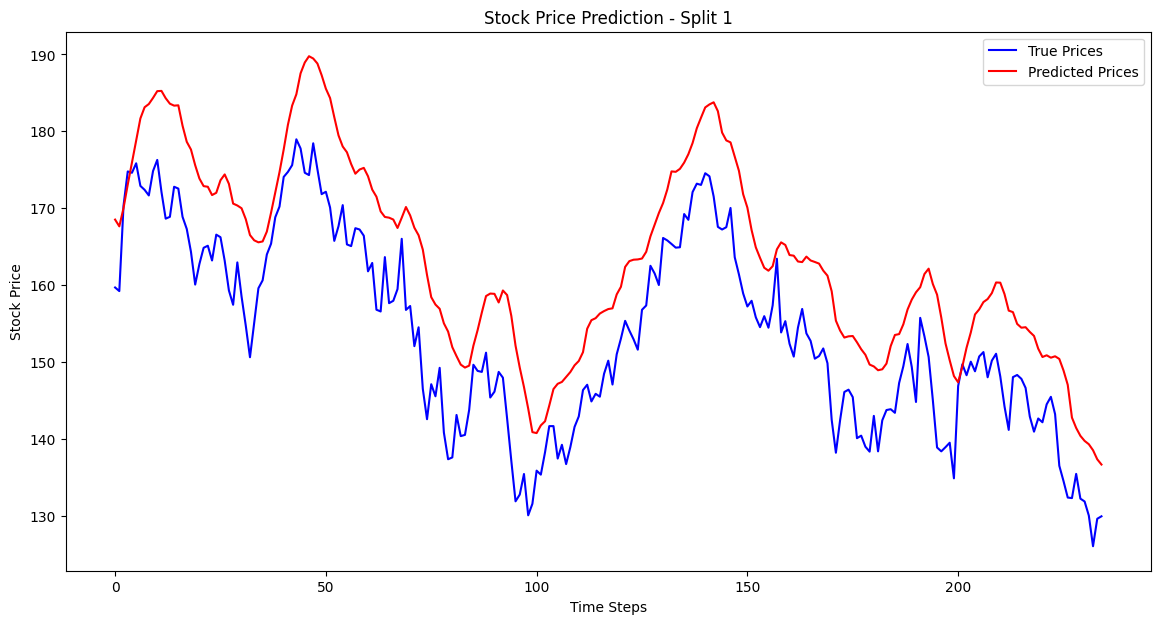

Split 1: MSE: 107.6326045020486, RMSE: 10.374613462777715, MAE: 9.632556249740276, R²: 0.32788927741610696
Split 2: MSE: 19.687413474819607, RMSE: 4.4370500870307525, MAE: 3.3764115351780206, R²: 0.8242946593269861
Split 3: MSE: 151.72712485133033, RMSE: 12.317756486119148, MAE: 11.610904315790048, R²: 0.1057821520737835


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 107.6326045020486, RMSE: 10.374613462777715, MAE: 9.632556249740276, R²: 0.32788927741610696
Metrics for the 80/10/10 split: MSE: 19.687413474819607, RMSE: 4.4370500870307525, MAE: 3.3764115351780206, R²: 0.8242946593269861
Metrics for the 60/20/20 split: MSE: 151.72712485133033, RMSE: 12.317756486119148, MAE: 11.610904315790048, R²: 0.1057821520737835


In [ ]:
CNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 96)               │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 96)               │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 96)               │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,357 (454.52 KB)

 Trainable params: 38,785 (151.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,572 (303.02 KB)

In [ ]:
# Save the best model
CNN_1_model_2.save('CNN1_best_model.h5')

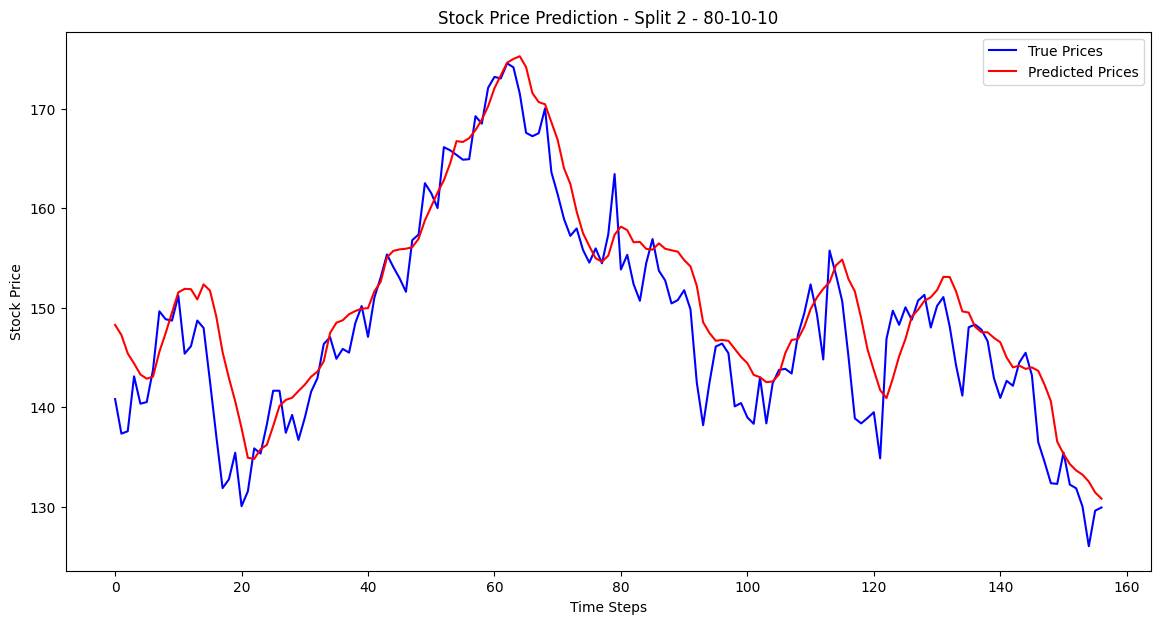

Split 1: MSE: 19.687413474819607, RMSE: 4.4370500870307525, MAE: 3.3764115351780206, R²: 0.8242946593269861


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2 - 80-10-10')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CNN1_best_model.h5')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


## CNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch


# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit to data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Increase input layer filters
    model.add(Conv1D(filters=hp.Int('filters', min_value=128, max_value=256, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Added Batch Normalization
    model.add(BatchNormalization())

    # Add more Conv1D layers
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))  # Keeps pooling size at 1 for control
        model.add(Dropout(hp.Float('dropout_2_' + str(i), 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Adjust regularization
    l2_reg = hp.Float('l2_regularization', 0.01, 0.1, step=0.01)
    model.add(Dense(1, kernel_regularizer=l2(l2_reg)))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-4, 1e-5, 1e-6, 1e-7])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    # Print summary
    model.summary()

    return model

In [ ]:
def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test):
    global best_model, best_mse, best_params

    # Hyperparameter tuning setup
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN2_Stock_Prediction'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Get the best model and its hyperparameters
    current_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Model Training
    history = current_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation on the test set
    y_pred = current_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, current_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_2_model_1 = run_experiment(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_2_model_2 = run_experiment(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_2_model_3 = run_experiment(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 02s]
val_loss: 6.5650763511657715

Best val_loss So Far: 6.190274715423584
Total elapsed time: 00h 06m 32s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,241 (415.00 KB)

 Trainable params: 105,921 (413.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 60.2828 - mean_absolute_error: 5.8378 - mean_squared_error: 60.1438 - val_loss: 42.7206 - val_mean_absolute_error: 6.1077 - val_mean_squared_error: 42.5836
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.4678 - mean_absolute_error: 6.0800 - mean_squared_error: 68.3310 - val_loss: 6.5953 - val_mean_absolute_error: 1.9481 - val_mean_squared_error: 6.4598
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.9589 - mean_absolute_error: 5.7969 - mean_squared_error: 59.8237 - val_loss: 6.3082 - val_mean_absolute_error: 1.9898 - val_mean_squared_error: 6.1743
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.7862 - mean_absolute_error: 6.2528 - mean_squared_error: 70.6527 - val_loss: 6.0534 - val_mean_absolute_error: 1.9183 - val_mean_squared_error: 5.9211
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.3900 - mean_absolute_error: 6.0700 - mean_squared_error: 69.2580 - val_loss: 9.8447 - val_mean_abso

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,241 (415.00 KB)

 Trainable params: 105,921 (413.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 233.9590 - mean_absolute_error: 10.4375 - mean_squared_error: 233.8195 - val_loss: 289.3170 - val_mean_absolute_error: 16.5169 - val_mean_squared_error: 289.1786
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 117.9606 - mean_absolute_error: 7.3751 - mean_squared_error: 117.8224 - val_loss: 143.7890 - val_mean_absolute_error: 11.2548 - val_mean_squared_error: 143.6519
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 106.4500 - mean_absolute_error: 7.2784 - mean_squared_error: 106.3132 - val_loss: 57.7044 - val_mean_absolute_error: 6.5634 - val_mean_squared_error: 57.5687
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 107.7138 - mean_absolute_error: 7.2773 - mean_squared_error: 107.5785 - val_loss: 22.3749 - val_mean_absolute_error: 3.8068 - val_mean_squared_error: 22.2406
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 119.8067 - mean_absolute_error: 7.9334 - mean_squared_error: 119.6726 - val_loss:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,241 (415.00 KB)

 Trainable params: 105,921 (413.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 58.6059 - mean_absolute_error: 5.8255 - mean_squared_error: 58.4675 - val_loss: 285.7520 - val_mean_absolute_error: 16.6553 - val_mean_squared_error: 285.6155
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 46.2552 - mean_absolute_error: 5.3751 - mean_squared_error: 46.1190 - val_loss: 152.3670 - val_mean_absolute_error: 12.0335 - val_mean_squared_error: 152.2319
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 46.6304 - mean_absolute_error: 5.3613 - mean_squared_error: 46.4956 - val_loss: 100.6523 - val_mean_absolute_error: 9.6625 - val_mean_squared_error: 100.5189
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 45.9837 - mean_absolute_error: 5.1893 - mean_squared_error: 45.8505 - val_loss: 77.0745 - val_mean_absolute_error: 8.3645 - val_mean_squared_error: 76.9426
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 38.9176 - mean_absolute_error: 4.8083 - mean_squared_error: 38.7860 - val_loss: 15.7

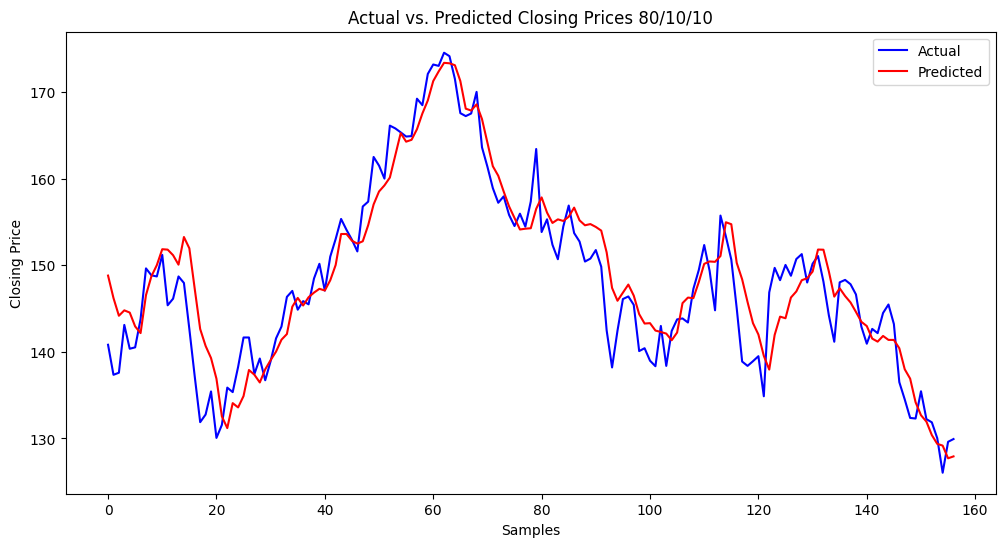

In [ ]:
# Graph Actual vs Predicted for the second split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## CNN Combine 3

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Compute MACD
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()

    # Compute Bollinger Bands
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)

    # Calculate Volatility as Percentage Change
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

    # Extract Day, Month, Year
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Apply feature engineering
df = feature_engineering(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare data
X = df[feature_columns].values
y = df['Close'].values


# Create a MinMaxScaler instance and fit to data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN3_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)  # 30% for val+test
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)  # 15% for each

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)  # 20% for val+test
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)  # 10% for each

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)  # 40% for val+test
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)  # 20% for each

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 32s]
val_loss: 168.5799102783203

Best val_loss So Far: 4.8092498779296875
Total elapsed time: 00h 03m 32s
Best Hyperparameters:
Number of Layers: 2
Filters: 64
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 116.5076 - mean_absolute_error: 7.6839 - mean_squared_error: 116.5076 - val_loss: 5.8030 - val_mean_absolute_error: 1.8584 - val_mean_squared_error: 5.8030
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 118.0029 - mean_absolute_error: 7.8533 - mean_squared_error: 118.0029 - val_loss: 17.7579 - val_mean_absolute_error: 3.5892 - val_mean_squared_error: 17.7579
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 107.3297 - mean_absolute_error: 7.6266 - mean_squared_error: 107.3297 - val_loss: 6.1630 - val_mean_absolute_error: 2.0190 - val_mean_squared_error: 6.1630
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 95.3159 - mean_absolute_error: 7.2928 - mean_squared_error: 95.3159 - val_loss: 10.5049 - val_mean_absolute_error: 2.5864 - val_mean_squared_error: 10.5049
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 120.1269 - mean_absolute_error: 7.9722 - mean_squared_error: 120.1269 - val_loss: 6.1453 - 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 154.2647 - mean_absolute_error: 8.6060 - mean_squared_error: 154.2647 - val_loss: 54.4196 - val_mean_absolute_error: 6.4667 - val_mean_squared_error: 54.4196
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 150.5037 - mean_absolute_error: 8.7284 - mean_squared_error: 150.5037 - val_loss: 21.4180 - val_mean_absolute_error: 3.5722 - val_mean_squared_error: 21.4180
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 177.4867 - mean_absolute_error: 9.2347 - mean_squared_error: 177.4867 - val_loss: 82.0115 - val_mean_absolute_error: 8.2693 - val_mean_squared_error: 82.0115
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 152.6157 - mean_absolute_error: 8.9239 - mean_squared_error: 152.6157 - val_loss: 81.8958 - val_mean_absolute_error: 8.2837 - val_mean_squared_error: 81.8958
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 147.1473 - mean_absolute_error: 8.4788 - mean_squared_error: 147.1473 - val_loss: 155.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 77.7279 - mean_absolute_error: 6.7483 - mean_squared_error: 77.7279 - val_loss: 37.3989 - val_mean_absolute_error: 5.5525 - val_mean_squared_error: 37.3989
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.9884 - mean_absolute_error: 6.4066 - mean_squared_error: 70.9884 - val_loss: 18.5730 - val_mean_absolute_error: 3.5646 - val_mean_squared_error: 18.5730
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.8873 - mean_absolute_error: 6.2739 - mean_squared_error: 65.8873 - val_loss: 10.6784 - val_mean_absolute_error: 2.4430 - val_mean_squared_error: 10.6784
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.4596 - mean_absolute_error: 6.1092 - mean_squared_error: 63.4596 - val_loss: 81.7263 - val_mean_absolute_error: 8.6335 - val_mean_squared_error: 81.7263
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.8746 - mean_absolute_error: 6.4716 - mean_squared_error: 71.8746 - val_loss: 28.8563 - val_me

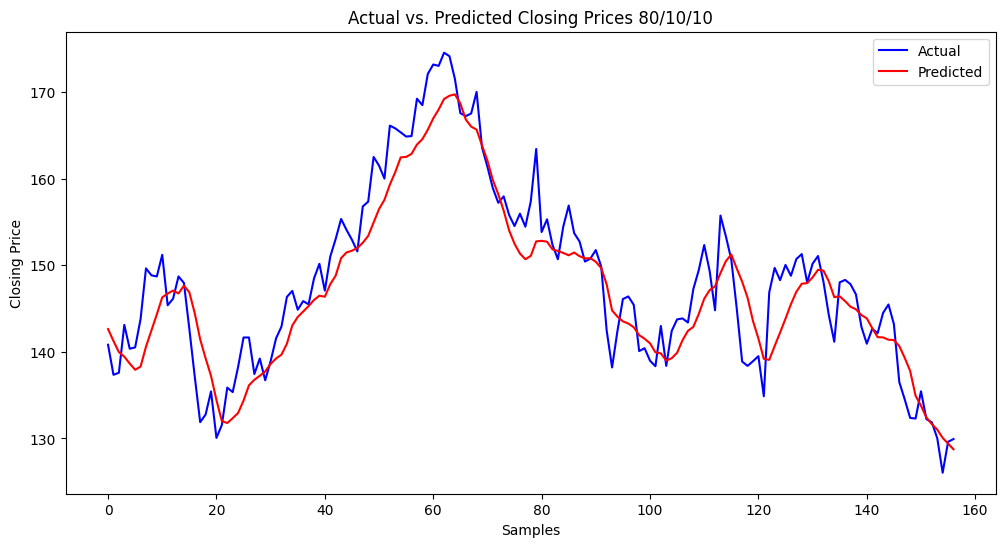

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# RNN

## RNN 10

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get Apple stock data for the past 10 years
data = yf.download('AAPL', period='10y')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0192 - mae: 0.0787 - mse: 0.0192
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0128e-04 - mae: 0.0123 - mse: 3.0128e-04
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.3130e-04 - mae: 0.0142 - mse: 3.3130e-04
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.2387e-04 - mae: 0.0112 - mse: 2.2387e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.3097e-04 - mae: 0.0116 - mse: 2.3097e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.7306e-04 - mae: 0.0098 - mse: 1.7306e-04
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.2198e-04 - mae: 0.0115 - mse: 2.2198e-04
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.7464e-04 - mae: 0.0099 - mse: 1.7464e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8693e-04 - mae: 0.0103 - mse: 1.8693e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.3333e-04 - mae: 0.0080 - mse: 1.3333e-0

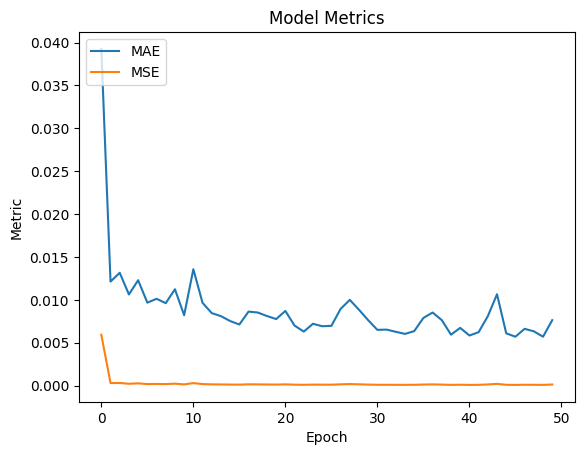

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN 5 Years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get Apple stock data for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data with minmax
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0588 - mae: 0.1697 - mse: 0.0588
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - mae: 0.0247 - mse: 0.0012
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0795e-04 - mae: 0.0177 - mse: 6.0795e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.3941e-04 - mae: 0.0165 - mse: 5.3941e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.0142e-04 - mae: 0.0150 - mse: 4.0142e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.0944e-04 - mae: 0.0124 - mse: 3.0944e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.3973e-04 - mae: 0.0132 - mse: 3.3973e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 3.2830e-04 - mae: 0.0135 - mse: 3.2830e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.9052e-04 - mae: 0.0122 - mse: 2.9052e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.0075e-04 - mae: 0.0128 - mse: 3.0075e-04
Epoch 

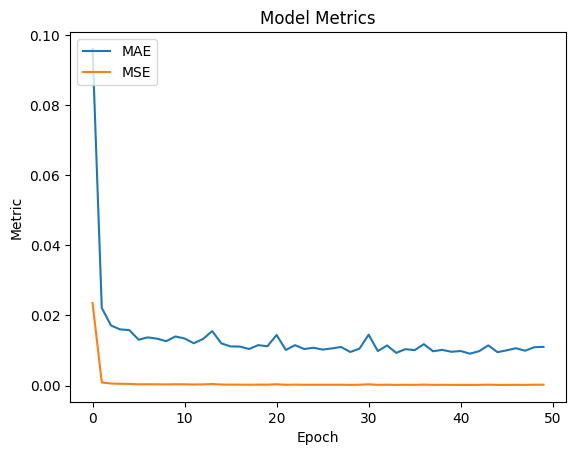

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN Feature Engineering

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for Apple for 7 years
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('AAPL', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Calculate RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training, validation, and test sets (70/15/15 split)
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.15)
test_size = len(scaled_data) - train_size - val_size
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

In [ ]:
# Create sequences for predicting 'Close' price
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
target_feature_index = features.index('Close')
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Build RNN model to predict 'Close' value
RNN3 = Sequential()
RNN3.add(SimpleRNN(units=64, activation='relu', input_shape=(seq_length, len(features))))
RNN3.add(Dense(units=1))

# Compile the model
RNN3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = RNN3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

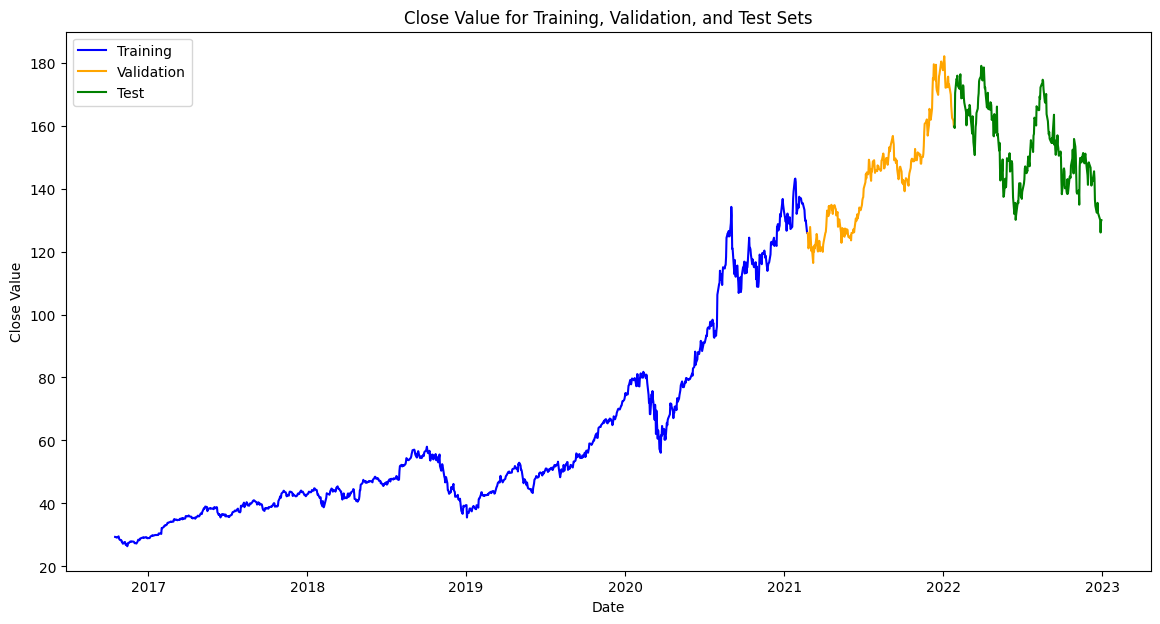

In [ ]:
import matplotlib.pyplot as plt

# Obtain the dates for each subset
train_dates = df.index[:train_size]
val_dates = df.index[train_size:train_size + val_size]
test_dates = df.index[train_size + val_size:]

# Obtain the close values for each subset
train_close = df['Close'][:train_size]
val_close = df['Close'][train_size:train_size + val_size]
test_close = df['Close'][train_size + val_size:]

# Plot the close value for each subset
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_close, label='Training', color='blue')
plt.plot(val_dates, val_close, label='Validation', color='orange')
plt.plot(test_dates, test_close, label='Test', color='green')

plt.title('Close Value for Training, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 5.5369154908547085
MAE: 4.471526174500699
MSE: 30.657433152866837
R-squared: 0.8031347790058929


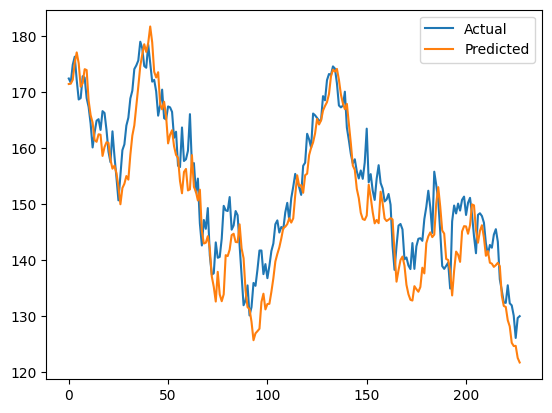

In [ ]:
# Make predictions for 'Close' value
predictions = RNN3.predict(X_test).flatten()  # Flatten predictions to (228,)
predictions = np.expand_dims(predictions, axis=1)  # Reshape predictions to (228,1)
predictions = np.concatenate((predictions, np.zeros((len(predictions), len(features) - 1))), axis=1)  # Add zeros to match the input shape
predictions = scaler.inverse_transform(predictions)[:, 0]  # Inverse transform and extract the first column

y_test = y_test.reshape(-1, 1)  # Reshape 'y_test' to match predictions
y_test = np.concatenate((y_test, np.zeros((len(y_test), len(features) - 1))), axis=1)  # Add zeros to match input shape
y_test = scaler.inverse_transform(y_test)[:, 0]  # Inverse transform and extract the first column

# Evaluate the model for 'Close' value prediction
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics for 'Close' value prediction
print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

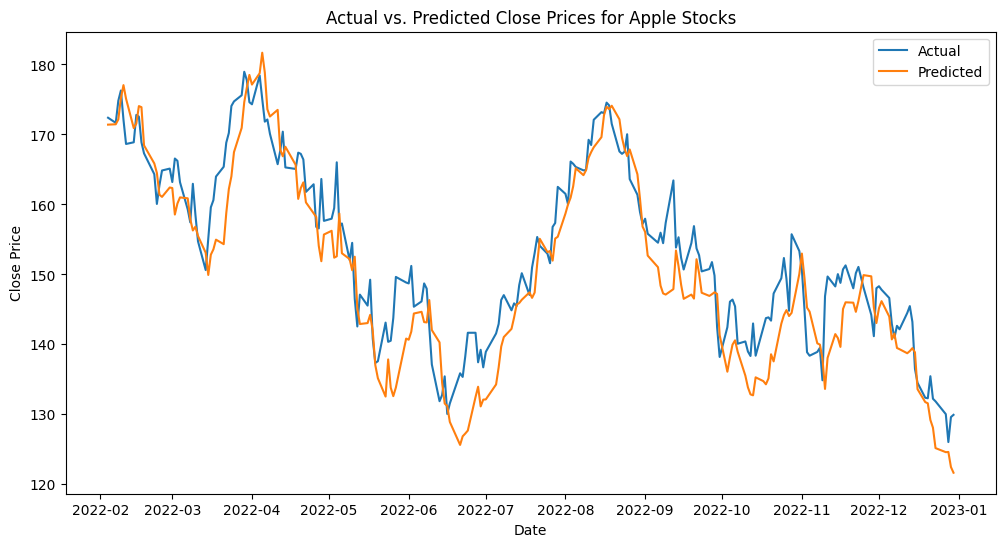

In [ ]:
# Get the original dates for the test set
original_dates = df.index[train_size + val_size + seq_length:]
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(original_dates, y_test, label='Actual')
plt.plot(original_dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices for Apple Stocks')
plt.legend()
plt.show()

## RNN hypertunining parameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Model 1: Basic RNN
model1 = Sequential()
model1.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: RNN with Dropout
model2 = Sequential()
model2.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper RNN
model3 = Sequential()
model3.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(SimpleRNN(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic RNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (RNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper RNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0784 - val_loss: 3.2127e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6895e-04 - val_loss: 1.4199e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6104e-04 - val_loss: 1.3536e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8095e-04 - val_loss: 1.4724e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6231e-04 - val_loss: 1.3339e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7017e-04 - val_loss: 1.6658e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6861e-04 - val_loss: 1.4172e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8049e-04 - val_loss: 1.3702e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6930e-04 - val_loss: 1.4202e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7876e-04 - val_loss: 1.3760e-04
Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1221 - val_loss: 4.2

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Model 1 (Basic RNN) - RMSE: 1.8563235736754666 MAE: 1.226088205973307 MSE: 3.445937210183256 R^2: 0.9985181357037692
Model 2 (RNN with Dropout) - RMSE: 3.47949514271664 MAE: 2.5373109470714215 MSE: 12.106886448188689 R^2: 0.9947936478026724
Model 3 (Deeper RNN) - RMSE: 2.5696103466416043 MAE: 1.6288165973894522 MSE: 6.602897333567586 R^2: 0.9971605408881579


## RNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping



def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Apply feature engineering
df = feature_engineering(df)

# Select only the specified feature columns
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare data
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
def build_model(hp):
    model = Sequential()
    for _ in range(hp.Int('num_layers', 1, 3)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10), activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 23s]
val_loss: 4.773014068603516

Best val_loss So Far: 4.42264461517334
Total elapsed time: 00h 04m 34s
Best Hyperparameters:
Number of Layers: 1
units: 80
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 30.6927 - mean_absolute_error: 4.1361 - mean_squared_error: 30.6927 - val_loss: 5.1803 - val_mean_absolute_error: 1.7603 - val_mean_squared_error: 5.1803
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.7277 - mean_absolute_error: 4.3794 - mean_squared_error: 36.7277 - val_loss: 17.8586 - val_mean_absolute_error: 3.7104 - val_mean_squared_error: 17.8586
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.8232 - mean_absolute_error: 4.1451 - mean_squared_error: 31.8232 - val_loss: 7.2580 - val_mean_absolute_error: 2.1792 - val_mean_squared_error: 7.2580
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.2426 - mean_absolute_error: 4.2333 - mean_squared_error: 34.2426 - val_loss: 4.3409 - val_mean_absolute_error: 1.6309 - val_mean_squared_error: 4.3409
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.9889 - mean_absolute_error: 4.0760 - mean_squared_error: 30.9889 - val_loss: 36.0004 - val_mean_abs

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 46.8942 - mean_absolute_error: 4.7750 - mean_squared_error: 46.8942 - val_loss: 25.6374 - val_mean_absolute_error: 4.2493 - val_mean_squared_error: 25.6374
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.5715 - mean_absolute_error: 4.9994 - mean_squared_error: 47.5715 - val_loss: 11.9827 - val_mean_absolute_error: 2.6940 - val_mean_squared_error: 11.9827
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.9083 - mean_absolute_error: 4.6842 - mean_squared_error: 42.9083 - val_loss: 13.8636 - val_mean_absolute_error: 3.0022 - val_mean_squared_error: 13.8636
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.0518 - mean_absolute_error: 5.0209 - mean_squared_error: 51.0518 - val_loss: 18.6105 - val_mean_absolute_error: 3.4912 - val_mean_squared_error: 18.6105
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.1883 - mean_absolute_error: 4.8545 - mean_squared_error: 46.1883 - val_loss: 20.1701 - val_me

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 22.2707 - mean_absolute_error: 3.6354 - mean_squared_error: 22.2707 - val_loss: 6.0179 - val_mean_absolute_error: 1.8806 - val_mean_squared_error: 6.0179
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.7856 - mean_absolute_error: 3.1712 - mean_squared_error: 16.7856 - val_loss: 33.7345 - val_mean_absolute_error: 5.2219 - val_mean_squared_error: 33.7345
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.7494 - mean_absolute_error: 3.2599 - mean_squared_error: 18.7494 - val_loss: 13.8272 - val_mean_absolute_error: 3.0956 - val_mean_squared_error: 13.8272
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2215 - mean_absolute_error: 3.3649 - mean_squared_error: 19.2215 - val_loss: 6.8882 - val_mean_absolute_error: 1.9530 - val_mean_squared_error: 6.8882
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.7060 - mean_absolute_error: 3.3416 - mean_squared_error: 18.7060 - val_loss: 11.0135 - val_mean_a

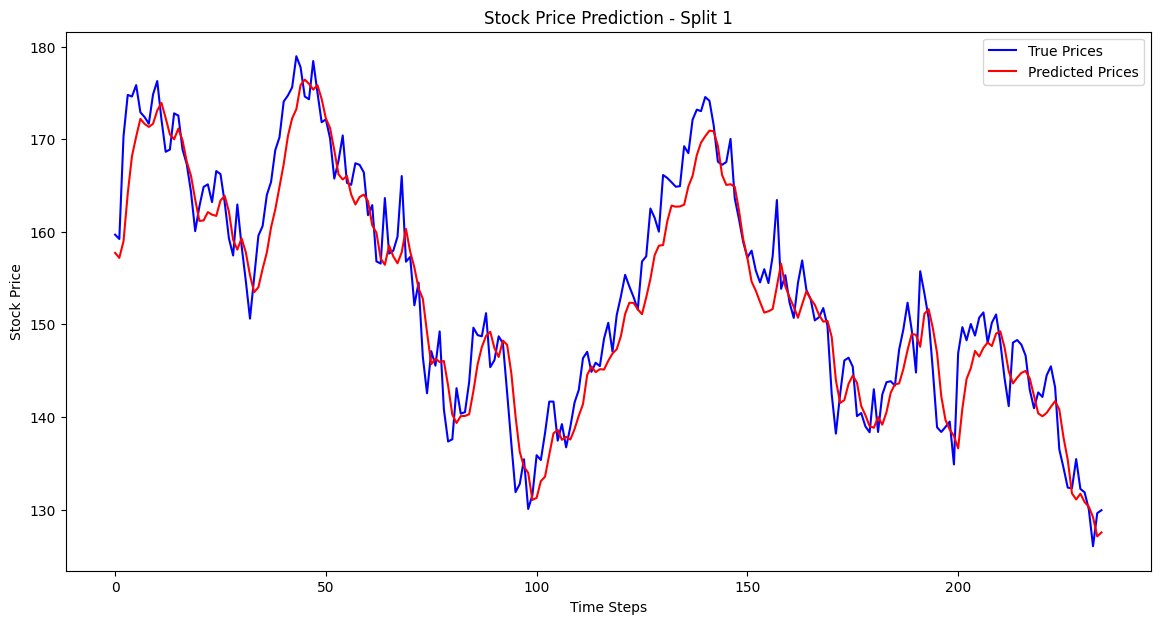

Split 1: MSE: 14.060076720466926, RMSE: 3.74967688214157, MAE: 3.032009855229804, R²: 0.912201991507154
Split 2: MSE: 13.416350550125768, RMSE: 3.6628336776498287, MAE: 2.9841762469832305, R²: 0.8802623591456812
Split 3: MSE: 16.229114020280665, RMSE: 4.028537454248212, MAE: 3.1662172798912365, R²: 0.9043522150229599


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 14.060076720466926, RMSE: 3.74967688214157, MAE: 3.032009855229804, R²: 0.912201991507154
Metrics for the 80/10/10 split: MSE: 13.416350550125768, RMSE: 3.6628336776498287, MAE: 2.9841762469832305, R²: 0.8802623591456812
Metrics for the 60/20/20 split: MSE: 16.229114020280665, RMSE: 4.028537454248212, MAE: 3.1662172798912365, R²: 0.9043522150229599


In [ ]:
RNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 80)               │           7,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,605 (84.40 KB)

 Trainable params: 7,201 (28.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,404 (56.27 KB)

In [ ]:
# Save the best model
RNN_1_model_2.save('RNN1_best_model.h5')

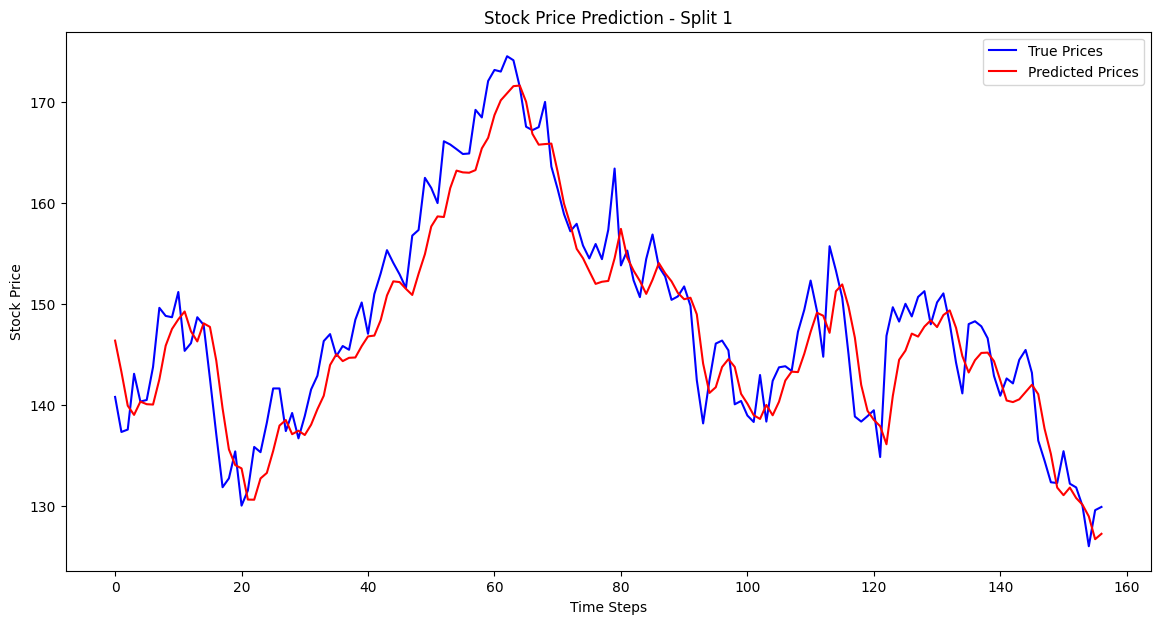

Split 2: MSE: 13.416350550125768, RMSE: 3.6628336776498287, MAE: 2.9841762469832305, R²: 0.8802623591456812


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

## RNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch


# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

<ipython-input-8-1e4807f94713>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch
[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add SimpleRNN layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10),
                           activation=activation,
                           return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN2_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])


    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model  # Return the best model as well

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_2_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_2_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_2_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 22s]
val_loss: 18.03228759765625

Best val_loss So Far: 6.19503927230835
Total elapsed time: 00h 03m 07s
Best Hyperparameters:
Number of Layers: 2
units: 140
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 106.7967 - mean_absolute_error: 7.3695 - mean_squared_error: 106.7967 - val_loss: 18.3465 - val_mean_absolute_error: 3.8109 - val_mean_squared_error: 18.3465
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.0652 - mean_absolute_error: 6.7478 - mean_squared_error: 82.0652 - val_loss: 8.0742 - val_mean_absolute_error: 2.0488 - val_mean_squared_error: 8.0742
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.3631 - mean_absolute_error: 6.4270 - mean_squared_error: 76.3631 - val_loss: 217.9348 - val_mean_absolute_error: 14.3276 - val_mean_squared_error: 217.9348
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94.2243 - mean_absolute_error: 7.1468 - mean_squared_error: 94.2243 - val_loss: 74.3012 - val_mean_absolute_error: 8.2309 - val_mean_squared_error: 74.3012
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.3220 - mean_absolute_error: 6.4597 - mean_squared_error: 80.3220 - val_loss: 8.1777 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 118.5698 - mean_absolute_error: 7.6471 - mean_squared_error: 118.5698 - val_loss: 77.6664 - val_mean_absolute_error: 7.7761 - val_mean_squared_error: 77.6664
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 132.8261 - mean_absolute_error: 8.1546 - mean_squared_error: 132.8261 - val_loss: 44.8799 - val_mean_absolute_error: 5.6627 - val_mean_squared_error: 44.8799
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.1726 - mean_absolute_error: 7.2409 - mean_squared_error: 116.1726 - val_loss: 503.9547 - val_mean_absolute_error: 21.9505 - val_mean_squared_error: 503.9547
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 148.6190 - mean_absolute_error: 8.7380 - mean_squared_error: 148.6190 - val_loss: 20.4334 - val_mean_absolute_error: 3.5857 - val_mean_squared_error: 20.4334
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.4300 - mean_absolute_error: 7.2209 - mean_squared_error: 109.4300 - val_loss: 40.

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
Reloading Tuner from project_dir/RNN2_Stock_Prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 2
units: 140
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 62.1471 - mean_absolute_error: 6.0441 - mean_squared_error: 62.1471 - val_loss: 17.0533 - val_mean_absolute_error: 3.0346 - val_mean_squared_error: 17.0533
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.6134 - mean_absolute_error: 5.3927 - mean_squared_error: 47.6134 - val_loss: 21.6314 - val_mean_absolute_error: 3.4940 - val_mean_squared_error: 21.6314
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 43.4219 - mean_absolute_error: 5.1928 - mean_squared_error: 43.4219 - val_loss: 130.0457 - val_mean_absolute_error: 10.9392 - val_mean_squared_error: 130.0457
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 45.6040 - mean_absolute_error: 5.2017 - mean_squared_error: 45.6040 - val_loss: 14.8946 - val_mean_absolute_error: 3.0777 - val_mean_squared_error: 14.8946
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 41.8790 - mean_absolute_error: 5.1120 - mean_squared_error: 41.8790 - val_loss: 26.4581 - 

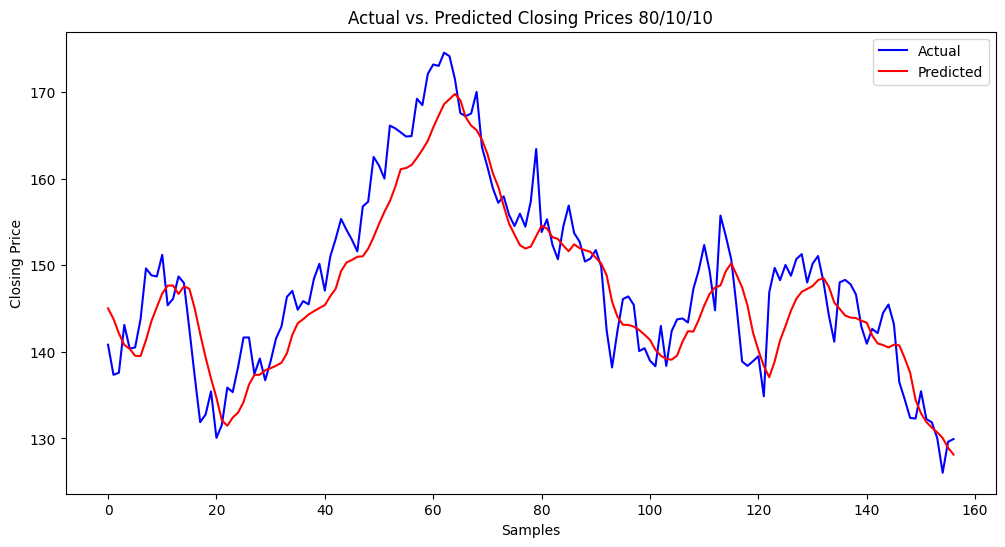

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## RNN Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Apply feature engineering
df = feature_engineering(df)

feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]

# Prepare the data
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add SimpleRNN layer
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu', return_sequences=True))

    # Add SimpleRNN layers according to best hyperparameters settings
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                             activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Final RNN layer without return_sequences
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu'))


    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 19s]
val_loss: 493.6243591308594

Best val_loss So Far: 16.30130386352539
Total elapsed time: 00h 09m 55s
Best Hyperparameters:
Number of Layers: 1
units: 128
Dropout Rate: 0.5
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 175.1086 - mean_absolute_error: 9.2263 - mean_squared_error: 175.1086 - val_loss: 34.9243 - val_mean_absolute_error: 5.1550 - val_mean_squared_error: 34.9243
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 11.6212 - mean_absolute_error: 2.5617 - mean_squared_error: 11.6212 - val_loss: 18.5021 - val_mean_absolute_error: 3.1927 - val_mean_squared_error: 18.5021
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9990 - mean_absolute_error: 1.9053 - mean_squared_error: 6.9990 - val_loss: 55.8766 - val_mean_absolute_error: 6.7851 - val_mean_squared_error: 55.8766
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 22.4254 - mean_absolute_error: 3.7221 - mean_squared_error: 22.4254 - val_loss: 27.6708 - val_mean_absolute_error: 4.0071 - val_mean_squared_error: 27.6708
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.1068 - mean_absolute_error: 1.7244 - mean_squared_error: 6.1068 - val_loss: 41.0169 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 365.0370 - mean_absolute_error: 13.8926 - mean_squared_error: 365.0370 - val_loss: 80.0002 - val_mean_absolute_error: 7.8848 - val_mean_squared_error: 80.0002
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 30.4894 - mean_absolute_error: 4.0679 - mean_squared_error: 30.4894 - val_loss: 76.5374 - val_mean_absolute_error: 7.7017 - val_mean_squared_error: 76.5374
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 10.7313 - mean_absolute_error: 2.2423 - mean_squared_error: 10.7313 - val_loss: 123.7288 - val_mean_absolute_error: 10.3870 - val_mean_squared_error: 123.7288
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 10.8849 - mean_absolute_error: 2.3505 - mean_squared_error: 10.8849 - val_loss: 140.7059 - val_mean_absolute_error: 11.2115 - val_mean_squared_error: 140.7059
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 10.1648 - mean_absolute_error: 2.2508 - mean_squared_error: 10.1648 - val_loss: 26.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 171.5075 - mean_absolute_error: 10.2385 - mean_squared_error: 171.5075 - val_loss: 275.3213 - val_mean_absolute_error: 16.1576 - val_mean_squared_error: 275.3213
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 10.8083 - mean_absolute_error: 2.6085 - mean_squared_error: 10.8083 - val_loss: 128.3890 - val_mean_absolute_error: 10.7599 - val_mean_squared_error: 128.3890
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8009 - mean_absolute_error: 1.6383 - mean_squared_error: 4.8009 - val_loss: 193.1107 - val_mean_absolute_error: 13.4324 - val_mean_squared_error: 193.1107
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.1849 - mean_absolute_error: 1.7046 - mean_squared_error: 5.1849 - val_loss: 142.5411 - val_mean_absolute_error: 11.4125 - val_mean_squared_error: 142.5411
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0607 - mean_absolute_error: 1.3461 - mean_squared_error: 3.0607 - val_loss: 66.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Metrics for the 70/15/15 split: MSE: 34.43040794301605, RMSE: 5.8677430024683295, MAE: 4.467721070634558, R²: 0.7849996618729199
Metrics for the 80/10/10 split: MSE: 69.39962942484702, RMSE: 8.330643998206082, MAE: 7.500611760813719, R²: 0.38062531442894887
Metrics for the 60/20/20 split: MSE: 210.92856632713648, RMSE: 14.523379989766035, MAE: 13.149443385700067, R²: -0.24312702051152346


In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 34.43040794301605, RMSE: 5.8677430024683295, MAE: 4.467721070634558, R²: 0.7849996618729199
Metrics for the 80/10/10 split: MSE: 69.39962942484702, RMSE: 8.330643998206082, MAE: 7.500611760813719, R²: 0.38062531442894887
Metrics for the 60/20/20 split: MSE: 210.92856632713648, RMSE: 14.523379989766035, MAE: 13.149443385700067, R²: -0.24312702051152346


In [ ]:
RNN_3_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 15, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,685 (967.52 KB)

 Trainable params: 82,561 (322.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,124 (645.02 KB)

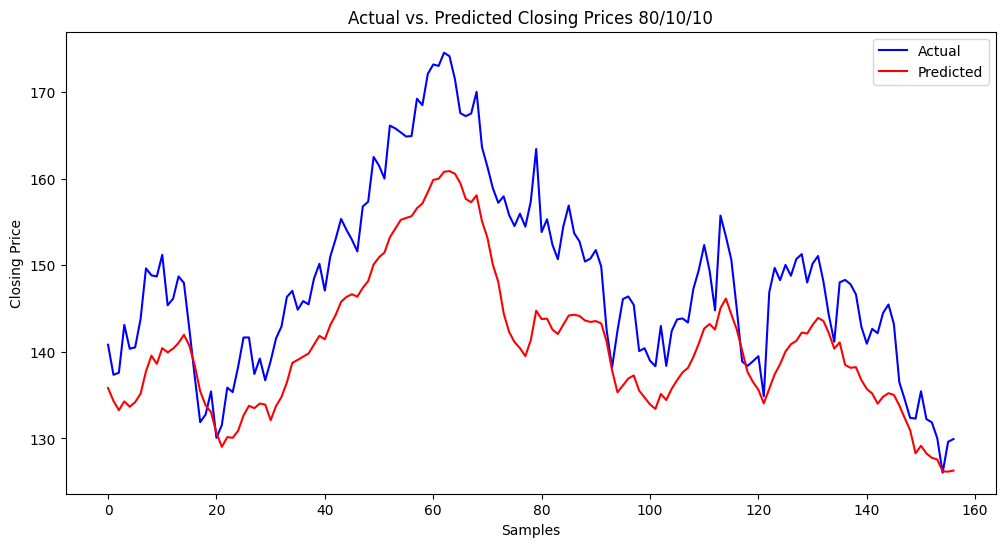

In [ ]:
import matplotlib.pyplot as plt
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM

## LSTM 10 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get Apple stock data for the past 10 years
data = yf.download('AAPL', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.0141 - mae: 0.0652 - mse: 0.0141
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 2.7619e-04 - mae: 0.0104 - mse: 2.7619e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 2.1811e-04 - mae: 0.0092 - mse: 2.1811e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1585e-04 - mae: 0.0093 - mse: 2.1585e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.8938e-04 - mae: 0.0086 - mse: 1.8938e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 1.8507e-04 - mae: 0.0087 - mse: 1.8507e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.8504e-04 - mae: 0.0087 - mse: 1.8504e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 1.7468e-04 - mae: 0.0084 - mse: 1.7468e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.6815e-04 - mae: 0.0083 - mse: 1.6815e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 1.3501e-04 - mae: 0.0072 - mse: 1.3501

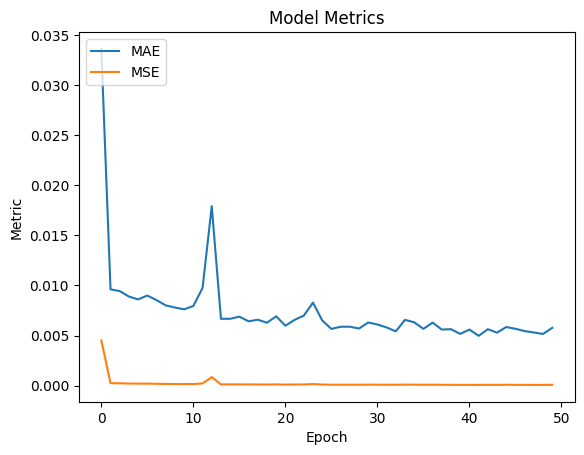

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## lstm 5 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get Apple stock data for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0563 - mae: 0.1583 - mse: 0.0563
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0017 - mae: 0.0314 - mse: 0.0017
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 8.6126e-04 - mae: 0.0215 - mse: 8.6126e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 8.4013e-04 - mae: 0.0211 - mse: 8.4013e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 7.9067e-04 - mae: 0.0205 - mse: 7.9067e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 8.7086e-04 - mae: 0.0208 - mse: 8.7086e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 8.2598e-04 - mae: 0.0207 - mse: 8.2598e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.0349e-04 - mae: 0.0188 - mse: 7.0349e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 6.8262e-04 - mae: 0.0187 - mse: 6.8262e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 7.0464e-04 - mae: 0.0190 - mse: 7.0464e-04
Epoch 

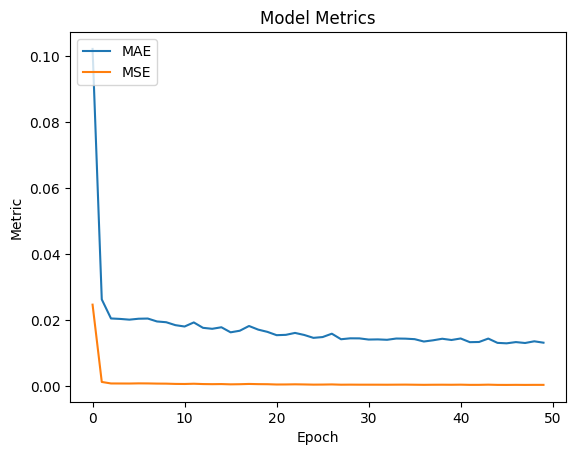

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## LSTM feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for Apple (7 years)
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('AAPL', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop NaN values resulting from feature engineering
df.dropna(inplace=True)

In [ ]:
# Define features and target
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
target = 'Close'

# Extract features and target
data = df[features].values
target_data = df[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target_data)

# Split the data into training, validation, and test sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, scaled_target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create sequences for LSTM
seq_length = 7
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train, y_train, seq_length)
X_val, y_val = create_sequences(X_val, y_val, seq_length)
X_test, y_test = create_sequences(X_test, y_test, seq_length)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
predictions = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0208 - mae: 0.0938 - mse: 0.0208 - val_loss: 0.0057 - val_mae: 0.0662 - val_mse: 0.0057
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8522e-04 - mae: 0.0183 - mse: 6.8522e-04 - val_loss: 0.0018 - val_mae: 0.0327 - val_mse: 0.0018
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1885e-04 - mae: 0.0131 - mse: 4.1885e-04 - val_loss: 0.0013 - val_mae: 0.0270 - val_mse: 0.0013
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5353e-04 - mae: 0.0118 - mse: 3.5353e-04 - val_loss: 0.0016 - val_mae: 0.0297 - val_mse: 0.0016
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8146e-04 - mae: 0.0110 - mse: 2.8146e-04 - val_loss: 0.0016 - val_mae: 0.0289 - val_mse: 0.0016
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2009e-04 - mae: 0.0114 - mse: 3.2009e-04 - val_loss: 9.4616e-04 - val_mae: 0.0245 - val_mse: 9.4616e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0181e-04

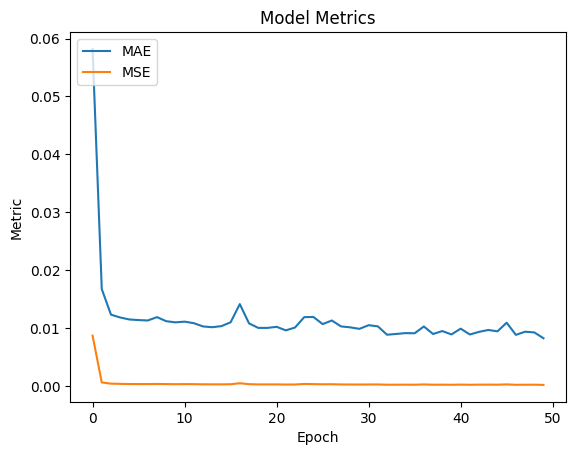

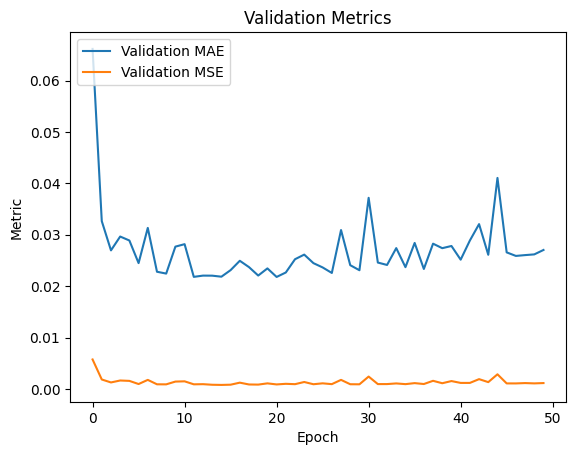

In [ ]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

# Plot validation metrics
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('Validation Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Validation MAE', 'Validation MSE'], loc='upper left')
plt.show()

## lstm  hyperparameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

In [ ]:
# Models
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(LSTM(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1512 - val_loss: 0.0081
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - val_loss: 5.9795e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.2583e-04 - val_loss: 4.8091e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7538e-04 - val_loss: 4.8831e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7099e-04 - val_loss: 3.5413e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0445e-04 - val_loss: 2.7457e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5027e-04 - val_loss: 2.9798e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4670e-04 - val_loss: 3.3283e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6940e-04 - val_loss: 3.0823e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2960e-04 - val_loss: 2.6751e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.8032e-04 - val_loss

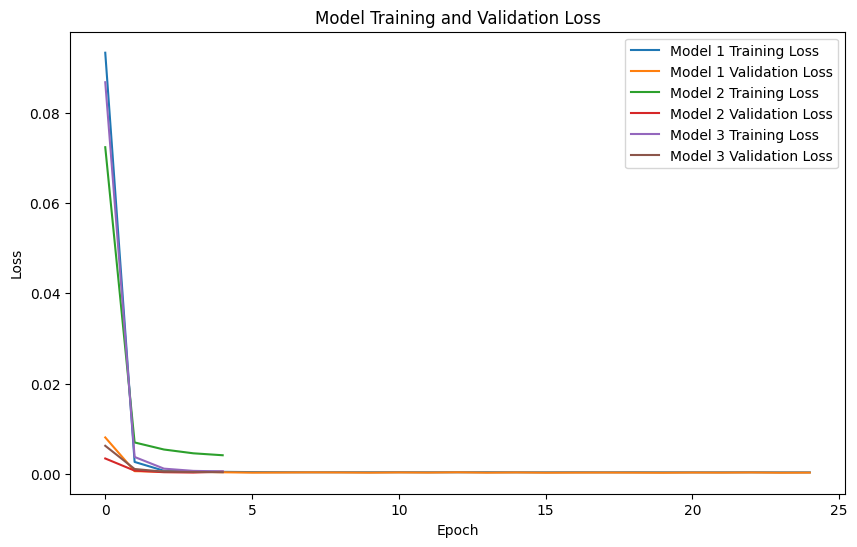

In [ ]:
# Evaluate models on the test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic LSTM) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (LSTM with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper LSTM) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

## LSTM Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
# Function to run the RNN model
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 35s]
val_loss: 20757.599609375

Best val_loss So Far: 14.323763847351074
Total elapsed time: 00h 05m 36s
Best Hyperparameters:
Number of Layers: 2
units: 110
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 143.7942 - mean_absolute_error: 8.3238 - mean_squared_error: 143.7942 - val_loss: 91.7633 - val_mean_absolute_error: 9.1823 - val_mean_squared_error: 91.7633
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112.5690 - mean_absolute_error: 7.7261 - mean_squared_error: 112.5690 - val_loss: 179.0299 - val_mean_absolute_error: 12.2652 - val_mean_squared_error: 179.0299
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 93.7444 - mean_absolute_error: 7.1270 - mean_squared_error: 93.7444 - val_loss: 687.1558 - val_mean_absolute_error: 25.2105 - val_mean_squared_error: 687.1558
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 111.9840 - mean_absolute_error: 7.5481 - mean_squared_error: 111.9840 - val_loss: 23.8802 - val_mean_absolute_error: 3.7249 - val_mean_squared_error: 23.8802
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 106.5725 - mean_absolute_error: 7.2356 - mean_squared_error: 106.5725 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 158.2417 - mean_absolute_error: 8.6445 - mean_squared_error: 158.2417 - val_loss: 26.2105 - val_mean_absolute_error: 4.0759 - val_mean_squared_error: 26.2105
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 146.6167 - mean_absolute_error: 8.8034 - mean_squared_error: 146.6167 - val_loss: 60.3060 - val_mean_absolute_error: 6.5030 - val_mean_squared_error: 60.3060
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 160.0827 - mean_absolute_error: 8.8708 - mean_squared_error: 160.0827 - val_loss: 18.9740 - val_mean_absolute_error: 3.5925 - val_mean_squared_error: 18.9740
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 139.9409 - mean_absolute_error: 8.2396 - mean_squared_error: 139.9409 - val_loss: 93.2731 - val_mean_absolute_error: 8.8305 - val_mean_squared_error: 93.2731
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 140.2133 - mean_absolute_error: 8.4581 - mean_squared_error: 140.2133 - val_loss: 748.48

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 52.4415 - mean_absolute_error: 5.5835 - mean_squared_error: 52.4415 - val_loss: 412.5251 - val_mean_absolute_error: 18.0642 - val_mean_squared_error: 412.5251
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 56.4683 - mean_absolute_error: 5.7495 - mean_squared_error: 56.4683 - val_loss: 778.8425 - val_mean_absolute_error: 25.6997 - val_mean_squared_error: 778.8425
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 50.1289 - mean_absolute_error: 5.5083 - mean_squared_error: 50.1289 - val_loss: 527.6688 - val_mean_absolute_error: 20.7528 - val_mean_squared_error: 527.6688
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 53.5120 - mean_absolute_error: 5.6079 - mean_squared_error: 53.5120 - val_loss: 173.5116 - val_mean_absolute_error: 11.2017 - val_mean_squared_error: 173.5116
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 55.0069 - mean_absolute_error: 5.6240 - mean_squared_error: 55.0069 - val_loss: 

Metrics for the 70/15/15 split: MSE: 54.424816382283275, RMSE: 7.37731769563188, MAE: 6.477655451348487, R²: 0.6601447783000003
Metrics for the 80/10/10 split: MSE: 14.074619235256227, RMSE: 3.751615550033909, MAE: 2.9121959224628036, R²: 0.8743874724459553
Metrics for the 60/20/20 split: MSE: 1110.5208465024516, RMSE: 33.32447818799946, MAE: 32.25744138967496, R²: -5.544957352943049


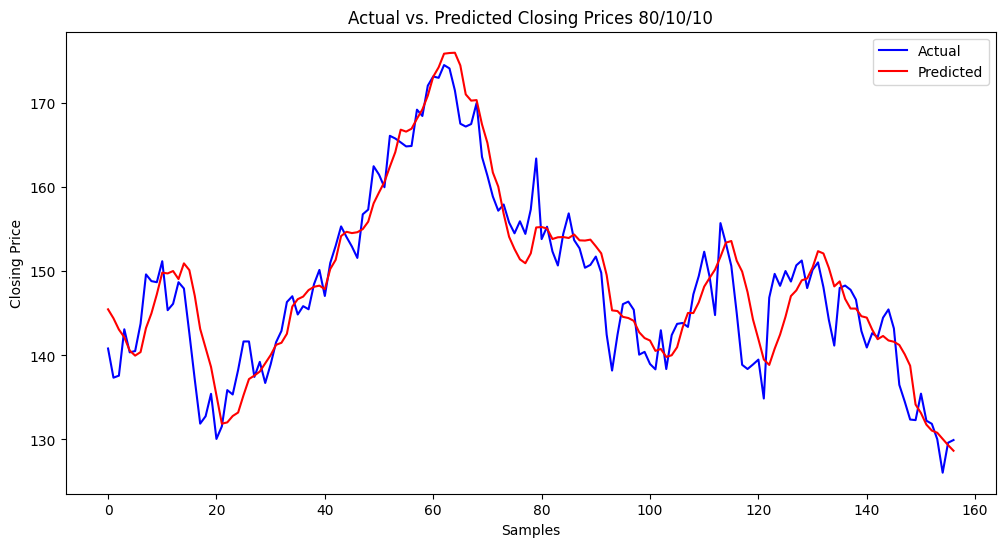

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Function to build LSTM model
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM2_Stock_Prediction'
    )

    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 33s]
val_loss: 20291.16015625

Best val_loss So Far: 9.112984657287598
Total elapsed time: 00h 04m 34s
Best Hyperparameters:
Number of Layers: 1
Units: 140
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 76.9835 - mean_absolute_error: 6.4802 - mean_squared_error: 76.9835 - val_loss: 62.8385 - val_mean_absolute_error: 7.5153 - val_mean_squared_error: 62.8385
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88.8211 - mean_absolute_error: 6.8749 - mean_squared_error: 88.8211 - val_loss: 12.3305 - val_mean_absolute_error: 2.4475 - val_mean_squared_error: 12.3305
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 66.7127 - mean_absolute_error: 6.0443 - mean_squared_error: 66.7127 - val_loss: 11.0217 - val_mean_absolute_error: 2.5985 - val_mean_squared_error: 11.0217
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 75.0083 - mean_absolute_error: 6.2684 - mean_squared_error: 75.0083 - val_loss: 17.3864 - val_mean_absolute_error: 3.6739 - val_mean_squared_error: 17.3864
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 76.7780 - mean_absolute_error: 6.4920 - mean_squared_error: 76.7780 - val_loss: 17.7910 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 115.9781 - mean_absolute_error: 7.5284 - mean_squared_error: 115.9781 - val_loss: 18.5868 - val_mean_absolute_error: 3.3091 - val_mean_squared_error: 18.5868
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 115.3479 - mean_absolute_error: 7.4912 - mean_squared_error: 115.3479 - val_loss: 98.9959 - val_mean_absolute_error: 8.9791 - val_mean_squared_error: 98.9959
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 106.6265 - mean_absolute_error: 7.2765 - mean_squared_error: 106.6265 - val_loss: 45.7194 - val_mean_absolute_error: 5.5486 - val_mean_squared_error: 45.7194
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 113.9118 - mean_absolute_error: 7.5947 - mean_squared_error: 113.9118 - val_loss: 44.7571 - val_mean_absolute_error: 5.4666 - val_mean_squared_error: 44.7571
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.6009 - mean_absolute_error: 7.2045 - mean_squared_error: 111.6009 - val_loss: 23.943

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 48.5036 - mean_absolute_error: 5.3714 - mean_squared_error: 48.5036 - val_loss: 11.8931 - val_mean_absolute_error: 2.7620 - val_mean_squared_error: 11.8931
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.8637 - mean_absolute_error: 5.2774 - mean_squared_error: 47.8637 - val_loss: 22.0394 - val_mean_absolute_error: 4.0244 - val_mean_squared_error: 22.0394
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.1591 - mean_absolute_error: 4.7452 - mean_squared_error: 39.1591 - val_loss: 14.5069 - val_mean_absolute_error: 3.0888 - val_mean_squared_error: 14.5069
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.1419 - mean_absolute_error: 4.8018 - mean_squared_error: 40.1419 - val_loss: 30.7801 - val_mean_absolute_error: 4.8259 - val_mean_squared_error: 30.7801
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.4637 - mean_absolute_error: 5.0513 - mean_squared_error: 43.4637 - val_loss: 33.1670 - val_me

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Metrics for the 70/15/15 split: MSE: 66.26040824784704, RMSE: 8.140049646522252, MAE: 6.929094452553607, R²: 0.5862375432407511
Metrics for the 80/10/10 split: MSE: 27.341783953111715, RMSE: 5.228937172419623, MAE: 4.319091165141695, R²: 0.7559812785852277
Metrics for the 60/20/20 split: MSE: 35.7966108391407, RMSE: 5.983026896073651, MAE: 4.725822643730968, R²: 0.7890293621592475


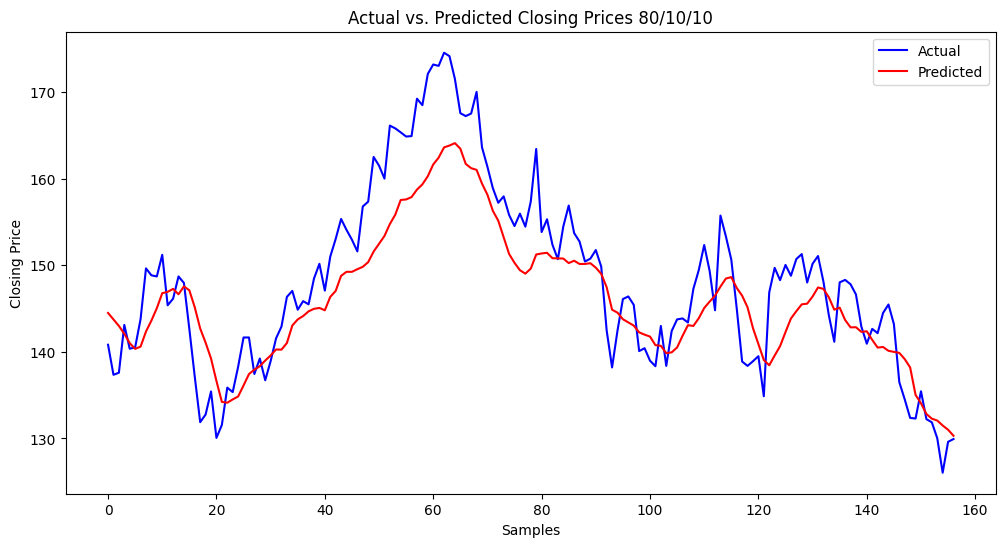

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function for feature engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

# RSI computation function
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Download historical data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Apply feature engineering
df = feature_engineering(df)

# Select features and target
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]
X = df[feature_columns].values
y = df['Close'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Function to build LSTM model
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 36s]
val_loss: 16167.447265625

Best val_loss So Far: 28.76999282836914
Total elapsed time: 00h 04m 58s
Best Hyperparameters:
Number of Layers: 1
units: 80
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 64.4358 - mean_absolute_error: 6.0923 - mean_squared_error: 64.4358 - val_loss: 61.4951 - val_mean_absolute_error: 6.9245 - val_mean_squared_error: 61.4951
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.4186 - mean_absolute_error: 6.2538 - mean_squared_error: 67.4186 - val_loss: 32.6832 - val_mean_absolute_error: 4.6581 - val_mean_squared_error: 32.6832
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.6363 - mean_absolute_error: 6.4990 - mean_squared_error: 76.6363 - val_loss: 40.9007 - val_mean_absolute_error: 5.4059 - val_mean_squared_error: 40.9007
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73.7785 - mean_absolute_error: 6.5243 - mean_squared_error: 73.7785 - val_loss: 32.9687 - val_mean_absolute_error: 4.7496 - val_mean_squared_error: 32.9687
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.1149 - mean_absolute_error: 6.5406 - mean_squared_error: 70.1149 - val_loss: 30.7586 - val_me

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 86.8878 - mean_absolute_error: 6.9089 - mean_squared_error: 86.8878 - val_loss: 55.5183 - val_mean_absolute_error: 6.1806 - val_mean_squared_error: 55.5183
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 86.3454 - mean_absolute_error: 6.9641 - mean_squared_error: 86.3454 - val_loss: 58.2934 - val_mean_absolute_error: 6.3937 - val_mean_squared_error: 58.2934
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 87.0896 - mean_absolute_error: 6.8816 - mean_squared_error: 87.0896 - val_loss: 55.2425 - val_mean_absolute_error: 6.2051 - val_mean_squared_error: 55.2425
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87.7715 - mean_absolute_error: 7.2036 - mean_squared_error: 87.7715 - val_loss: 61.4177 - val_mean_absolute_error: 6.6521 - val_mean_squared_error: 61.4177
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.5801 - mean_absolute_error: 6.9433 - mean_squared_error: 86.5801 - val_loss: 61.6447 - val_me

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 49.5433 - mean_absolute_error: 5.5657 - mean_squared_error: 49.5433 - val_loss: 41.4989 - val_mean_absolute_error: 5.4016 - val_mean_squared_error: 41.4989
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.2565 - mean_absolute_error: 5.6442 - mean_squared_error: 51.2565 - val_loss: 53.3318 - val_mean_absolute_error: 6.3457 - val_mean_squared_error: 53.3318
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.5383 - mean_absolute_error: 5.5270 - mean_squared_error: 50.5383 - val_loss: 60.8119 - val_mean_absolute_error: 6.8836 - val_mean_squared_error: 60.8119
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.6880 - mean_absolute_error: 5.6237 - mean_squared_error: 52.6880 - val_loss: 58.3389 - val_mean_absolute_error: 6.7346 - val_mean_squared_error: 58.3389
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.2563 - mean_absolute_error: 5.3698 - mean_squared_error: 47.2563 - val_loss: 81.5414 - val_me

In [ ]:
LSTM_3_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 80)                  │          30,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,405 (360.96 KB)

 Trainable params: 30,801 (120.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,604 (240.64 KB)

In [ ]:
# Save the best model
LSTM_3.save('LSTM_3_model_2.h5')

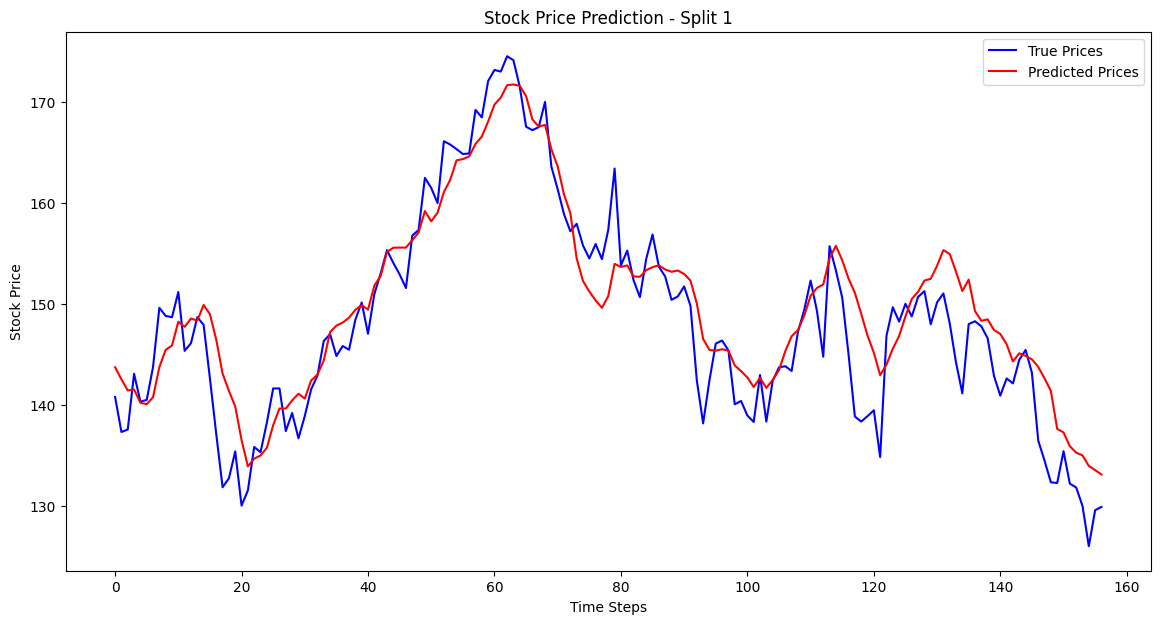

Split 1: MSE: 16.792917466507763, RMSE: 4.097916234686571, MAE: 3.134039860622139, R²: 0.8501273268771234


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")